# 3. Data Preparation

Hãy load lại data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import skew

pd.options.display.float_format = '{:,.4f}'.format

In [2]:
data = pd.read_csv(filepath_or_buffer="../data/house_price.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Chuyển "YearBuilt" và "YearRemodAdd" thành tuổi

In [3]:
data["HouseAge"] = data["YrSold"] - data["YearBuilt"]
data["RemodelAge"] = data["YrSold"] - data["YearRemodAdd"]

data = data.drop(columns=["YearBuilt", "YearRemodAdd", "YrSold"])

Tiếp theo ta sẽ xử lý giá trị NaN và các outlier.

In [4]:
# Also drop column "Id" because we don't use it
data = data.drop(columns=["Id", "Alley", "FireplaceQu", "GarageYrBlt", "PoolQC", "Fence", "MiscFeature"])

fillna_values = {
    "LotFrontage": 0,
    "MasVnrType": "None",
    "MasVnrArea": 0,
    "BsmtQual": "No_bsmt",
    "BsmtCond": "No_bsmt",
    "BsmtExposure": "No_bsmt",
    "BsmtFinType1": "No_bsmt",
    "BsmtFinType2": "No_bsmt",
    "Electrical": "None",
    "GarageType": "No_gara",
    "GarageFinish": "No_gara",
    "GarageQual": "No_gara",
    "GarageCond": "No_gara",
}
data = data.fillna(value=fillna_values)

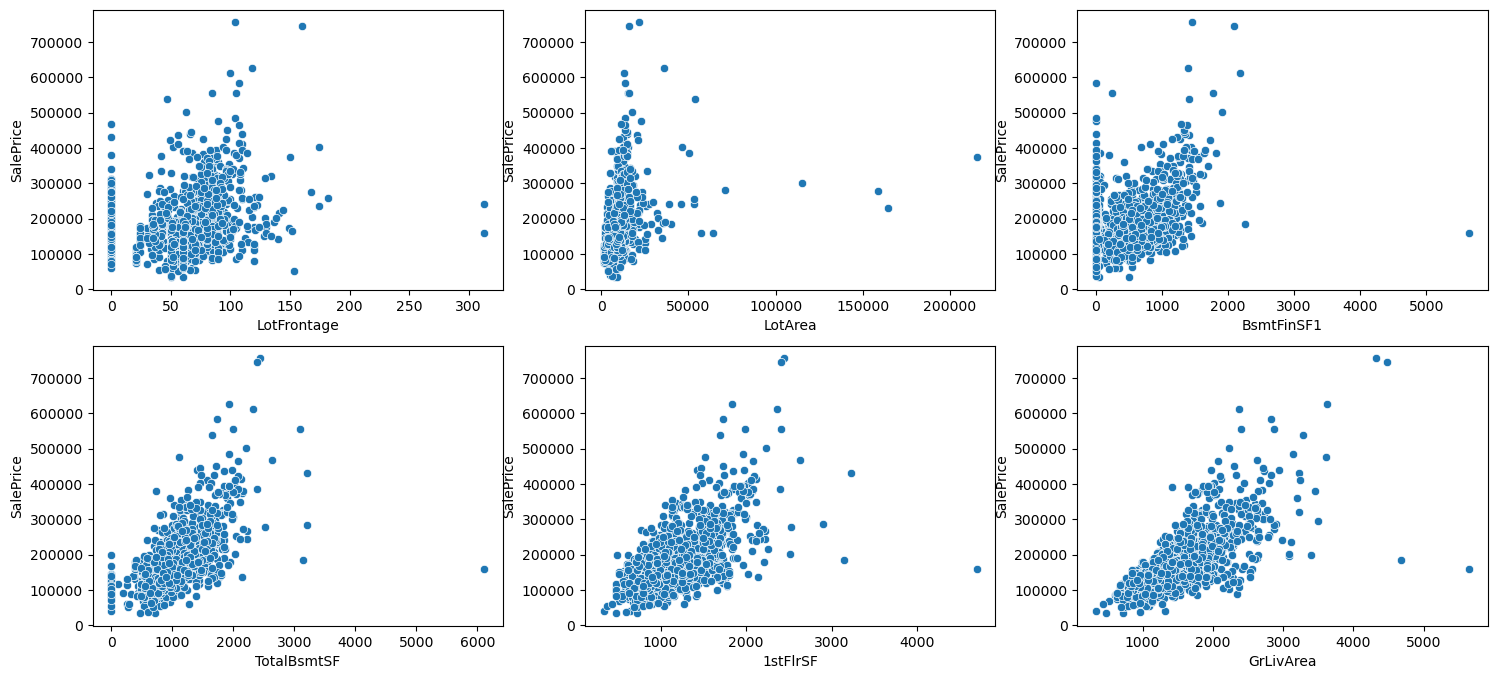

In [5]:
outlier_columns = ["LotFrontage", "LotArea", "BsmtFinSF1", "TotalBsmtSF", "1stFlrSF", "GrLivArea"]

plt.figure(figsize=(18, 8))

for i, column in enumerate(outlier_columns):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x=column, y="SalePrice", data=data)

plt.show()

In [6]:
# Sort data by "SalePrice" then remove 2 largest values
data = data.sort_values(by="SalePrice", ascending=False)
data = data.drop(index=[data.index[0], data.index[1]])

# Sort data by "SalePrice" then remove 5 smallest values
data = data.sort_values(by="SalePrice", ascending=True)
data = data.drop(index=[data.index[0], data.index[1], data.index[2], data.index[3], data.index[4]])

# Sort data by "LotFrontage" then remove largest value
data = data.sort_values(by="LotFrontage", ascending=False)
data = data.drop(index=[data.index[0], data.index[1]])

# Sort data by "LotArea" then remove 4 largest values
data = data.sort_values(by="LotArea", ascending=False)
data = data.drop(index=[data.index[0], data.index[1], data.index[2], data.index[3]])

# Sort data by "GrLivArea" then remove largest value
data = data.sort_values(by="GrLivArea", ascending=False)
data = data.drop(index=[data.index[0]])

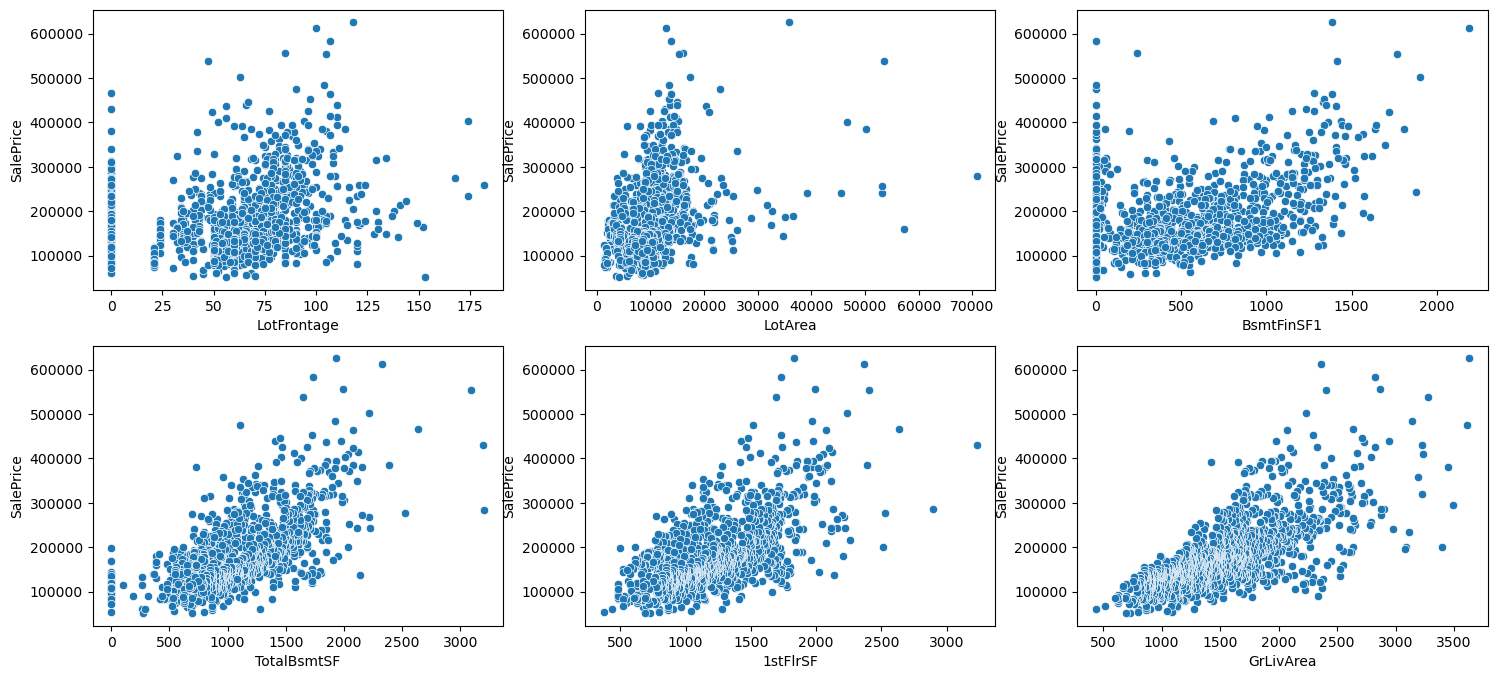

In [7]:
plt.figure(figsize=(18, 8))

for i, column in enumerate(outlier_columns):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x=column, y="SalePrice", data=data)

plt.show()

Label Encoding

In [8]:
data["ExterQual"] = data["ExterQual"].map({"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5})
data["ExterCond"] = data["ExterCond"].map({"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5})
data["BsmtQual"] = data["BsmtQual"].map({"No_bsmt": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5})
data["BsmtCond"] = data["BsmtCond"].map({"No_bsmt": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5})
data["BsmtExposure"] = data["BsmtExposure"].map({"No_bsmt": 0, "No": 1, "Mn": 2, "Av": 3, "Gd": 4})
data["HeatingQC"] =data["HeatingQC"].map({"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5})
data["CentralAir"] =data["CentralAir"].map({"N": 0, "Y": 1})
data["KitchenQual"] = data["KitchenQual"].map({"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5})
data["GarageFinish"] = data["GarageFinish"].map({"No_gara": 0, "Unf": 1, "RFn": 2, "Fin": 3})
data["GarageQual"] = data["GarageQual"].map({"No_gara": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5})
data["GarageCond"] = data["GarageCond"].map({"No_gara": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5})
data["PavedDrive"] = data["PavedDrive"].map({"N": 0, "P": 1, "Y": 2})

Xử lý các cột dạng số không có phân phối đều

In [9]:
numerical_columns = data.select_dtypes(exclude=["object"]).columns.tolist()

skewed_features = data[numerical_columns].apply(lambda x: skew(x.dropna()))
skewed_features = skewed_features[skewed_features > 0.75]
skewed_features = skewed_features.index

for f in skewed_features:
    data[f] = np.log1p(data[f])

Và để cho "công bằng", chúng ta sẽ cần chuẩn hóa các cột dạng số về khoảng giá trị 0 đến 1

In [10]:
numerical_columns.remove("SalePrice")

scaler = MinMaxScaler()
data[numerical_columns] = scaler.fit_transform(X=data[numerical_columns])

Bây giờ chúng ta sẽ mã hóa one-hot cho tát cả các cột dạng category. Sau đó phân chia thành dữ liệu huấn luyện và kiểm tra.

In [11]:
X_all = data.drop(columns=["SalePrice"])
y = data["SalePrice"]

In [12]:
mi_columns = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'ExterQual', 'BsmtQual', 'KitchenQual', '1stFlrSF', 'GarageArea', 'HouseAge',
              'MSSubClass', 'GarageFinish', 'FullBath', 'LotFrontage', '2ndFlrSF', 'LotArea', 'TotRmsAbvGrd', 'RemodelAge', 'BsmtFinSF1', 'HeatingQC',
              'Fireplaces', 'OpenPorchSF', 'BsmtUnfSF', 'OverallCond', 'MasVnrArea', 'HalfBath', 'BsmtExposure', 'GarageCond', 'WoodDeckSF',
              'GarageQual', 'CentralAir', 'BedroomAbvGr', 'BsmtCond', 'PavedDrive', 'KitchenAbvGr', 'BsmtFullBath', 'ExterCond', 'ScreenPorch',
              'EnclosedPorch', 'BsmtHalfBath',
              'Neighborhood', 'GarageType', 'Foundation', 'Exterior2nd', 'BsmtFinType1', 'Exterior1st', 'MSZoning', 'MasVnrType', 'LotShape',
              'HouseStyle', 'SaleType', 'SaleCondition', 'Electrical', 'BldgType', 'BsmtFinType2', 'LandContour', 'Condition1', 'Heating', 'RoofStyle',
              'LotConfig']
X_mi = X_all[mi_columns].copy()

In [13]:
X_all = pd.get_dummies(data=X_all)
X_mi = pd.get_dummies(data=X_mi)

X_R = X_mi.drop(columns=['MSSubClass', 'OverallCond', 'ExterCond', 'BsmtHalfBath']).copy()

In [14]:
X_train_all, X_test_all, X_train_mi, X_test_mi, X_train_R, X_test_R, y_train, y_test = train_test_split(X_all,
                                                                                                        X_mi,
                                                                                                        X_R,
                                                                                                        y,
                                                                                                        test_size=0.2,
                                                                                                        random_state=10)

Dữ liệu đã sẵn sàng, hãy tiến hành lập mô hình cơ sở đầu tiên dự đoán giá nhà của chúng ta

# 4. Modeling

In [15]:
# !pip install lightgbm

In [16]:
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_percentage_error

from lightgbm import LGBMRegressor

Chúng ta sẽ dùng hàm này để đánh giá các mô hình mà không cần viết lại code

In [17]:
def get_result(model, X_test, y_test=y_test):
    predictions = model.predict(X_test)
    r2 = r2_score(y_true=y_test, y_pred=predictions)
    mape = mean_absolute_percentage_error(y_true=y_test, y_pred=predictions)
    return {"MAPE": mape*100, "R2 score": r2}

Mô hình cơ sở LinearRegression()

In [18]:
base_model = LinearRegression()
base_model.fit(X_train_all, y_train)

LinearRegression()

Giờ chúng ta sẽ xây dựng thêm một số mô hình hồi quy khác khá phổ biến và mạnh mẽ:
- Lasso
- Ridge
- ElasticNet
- RandomForestRegressor
- SVR
- LGBMRegressor

Các giá trị mặc định của các tham số thường hoạt động tốt trong hầu hết trường hợp. Chúng ta hãy để nguyên xem kết quả ra sao rồi sẽ tinh chỉnh lại chúng ở phần sau.

Mô hình Lasso (cũng là mô hình LinearRegression nhưng với điều chuẩn L1)

In [19]:
lasso_model = Lasso()
lasso_model.fit(X_train_all, y_train)

Lasso()

Mô hình Ridge (cũng là mô hình LinearRegression nhưng với điều chuẩn L2)

In [20]:
ridge_model = Ridge()
ridge_model.fit(X_train_all, y_train)

Ridge()

Mô hình ElasticNet (cũng là mô hình LinearRegression nhưng kết hợp cả điều chuẩn L1 và L2)

In [21]:
elastic_model = ElasticNet()
elastic_model.fit(X_train_all, y_train)

ElasticNet()

Mô hình RandomForestRegressor - là một tập hợp các mô hình decision tree (cây quyết định)

In [22]:
random_forest = RandomForestRegressor()
random_forest.fit(X_train_all, y_train)

RandomForestRegressor()

Mô hình SVR - là mô hình hồi quy của SVM (Support Vector Machine)

In [23]:
SVR_model = SVR()
SVR_model.fit(X_train_all, y_train)

SVR()

Mô hình LGBMRegressor - cũng là một tập hợp các cây quyết định với gradient boosting

In [24]:
LGBM_model = LGBMRegressor()
LGBM_model.fit(X_train_all, y_train)

LGBMRegressor()

# 5. Model Evaluation

In [25]:
base_result = get_result(base_model, X_test=X_test_all)
lasso_result = get_result(lasso_model, X_test=X_test_all)
ridge_result = get_result(ridge_model, X_test=X_test_all)
elastic_result = get_result(elastic_model, X_test=X_test_all)
random_forest_result = get_result(random_forest, X_test=X_test_all)
SVR_result = get_result(SVR_model, X_test=X_test_all)
LGBM_result = get_result(LGBM_model, X_test=X_test_all)

In [26]:
all_results = pd.DataFrame({
    "Base model": base_result,
    "Lasso": lasso_result,
    "Ridge": ridge_result,
    "ElasticNet": elastic_result,
    "Random forest": random_forest_result,
    "SVR": SVR_result,
    "LGBM": LGBM_result
})

all_results.transpose().sort_values(by="MAPE", ascending=True)

,MAPE,R2 score
Ridge,0.6295,0.9227
LGBM,0.7053,0.9039
SVR,0.7130,0.9114
Random forest,0.7993,0.8769
Lasso,2.4438,-0.0000
ElasticNet,2.4438,-0.0000
Base model,"4,504,809,721.2953","-185,594,265,761,094,172,672.0000"


Mô hình Lasso, Elastic và base model (LinearRegression) có kết quả khá thấp

In [27]:
get_result(lasso_model, X_test=X_train_all, y_test=y_train)

{'MAPE': 2.5434272275632104, 'R2 score': 0.0}

In [28]:
get_result(elastic_model, X_test=X_train_all, y_test=y_train)

{'MAPE': 2.5434272275632104, 'R2 score': 0.0}

In [29]:
get_result(base_model, X_test=X_train_all, y_test=y_train)

{'MAPE': 0.5250406609158116, 'R2 score': 0.9478916957602839}

Mô hình cơ sở đã bị overfit do có quá nhiều đặc trưng, nó có kết quả tốt với tập train nhưng rất kém với tập test. Mô hình Lasso, Elastic thì không học được gì từ dữ liệu.

MAPE có kết quả quá tốt! Do chúng ta đang dự đoán giá nhà ở giá trị log, cần phải chuyển đổi giá nhà về đơn vị đúng trươc khi đánh giá.

Bây giờ ta sẽ chạy mô hình tốt nhất Ridge với bộ dữ liệu mà ta đã áp dụng feature selection và thử lấy ít đặc trưng hơn với trường dạng số chọn bới "Pearson r".

In [31]:
ridge_model_mi = Ridge()
ridge_model_mi.fit(X_train_mi, y_train)
ridge_result_mi = get_result(ridge_model_mi, X_test=X_test_mi)

ridge_model_R = Ridge()
ridge_model_R.fit(X_train_R, y_train)
ridge_result_R = get_result(ridge_model_R, X_test=X_test_R)

In [32]:
compare_results = pd.DataFrame({
    "Ridge all data": ridge_result,
    "Ridge mi": ridge_result_mi,
    "Ridge Pearson r": ridge_result_R
})

compare_results.transpose().sort_values(by="MAPE", ascending=True)

,MAPE,R2 score
Ridge mi,0.6282,0.9226
Ridge all data,0.6295,0.9227
Ridge Pearson r,0.6809,0.9118


Mô hình dùng đặc trưng chọn bởi "mutual information" có chất lượng tốt nhất, feature selection bằng "Pearson r" có chất lượng không bằng có lẽ do nó chỉ chọn các trường có quan hệ tuyến tính và loại bỏ cột không có quan hệ tuyến tính mặc dù có thể chúng vẫn có ảnh hưởng nhiều tới giá nhà. Hãy thử loại bỏ các trường mất cân bằng dữ liệu xem chất lượng tăng hay giảm.

In [33]:
X = data[mi_columns].copy()
y = data["SalePrice"]

imbalance_cols = ["GarageQual", "GarageCond", "CentralAir", "BsmtCond", "PavedDrive", "KitchenAbvGr", "ExterCond", "ScreenPorch", "EnclosedPorch",
                  "BsmtHalfBath",
                  'LandContour', 'Condition1', 'BsmtFinType2', 'Heating', 'Electrical']
X_2 = X.drop(columns=imbalance_cols).copy()

In [34]:
X = pd.get_dummies(data=X)
X_2 = pd.get_dummies(data=X_2)

X_train, X_test, X_train_2, X_test_2, y_train, y_test = train_test_split(X, X_2, y, test_size=0.2, random_state=10)

Chuyển đổi giá nhà trước khi đánh giá

In [35]:
def get_result(model, X_test, y_test=y_test):
    predictions = model.predict(X_test)
    r2 = r2_score(y_true=np.expm1(y_test), y_pred=np.expm1(predictions))
    mape = mean_absolute_percentage_error(y_true=np.expm1(y_test), y_pred=np.expm1(predictions))
    return {"MAPE": mape*100, "R2 score": r2}

In [37]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
lasso_result = get_result(lasso_model, X_test=X_test)

ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
ridge_result = get_result(ridge_model, X_test=X_test)

elastic_model = ElasticNet()
elastic_model.fit(X_train, y_train)
elastic_result = get_result(elastic_model, X_test=X_test)

random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
random_forest_result = get_result(random_forest, X_test=X_test)

SVR_model = SVR()
SVR_model.fit(X_train, y_train)
SVR_result = get_result(SVR_model, X_test=X_test)

LGBM_model = LGBMRegressor()
LGBM_model.fit(X_train, y_train)
LGBM_result = get_result(LGBM_model, X_test=X_test)

In [38]:
all_results = pd.DataFrame({
    "Lasso": lasso_result,
    "Ridge": ridge_result,
    "ElasticNet": elastic_result,
    "Random forest": random_forest_result,
    "SVR": SVR_result,
    "LGBM": LGBM_result
})

all_results.transpose().sort_values(by="MAPE", ascending=True)

,MAPE,R2 score
Ridge,7.5905,0.9331
LGBM,8.6858,0.9087
SVR,8.7320,0.9112
Random forest,10.0960,0.8749
Lasso,30.4453,-0.0294
ElasticNet,30.4453,-0.0294


In [39]:
ridge_model_2 = Ridge()
ridge_model_2.fit(X_train_2, y_train)
ridge_result_2 = get_result(ridge_model_2, X_test=X_test_2)

SVR_model_2 = SVR()
SVR_model_2.fit(X_train_2, y_train)
SVR_result_2 = get_result(SVR_model_2, X_test=X_test_2)

In [41]:
compare_results = pd.DataFrame({
    "SVR MI": SVR_result,
    "Ridge MI": ridge_result,
    "SVR 2": SVR_result_2,
    "Ridge 2": ridge_result_2
})

compare_results.transpose().sort_values(by="MAPE", ascending=True)

,MAPE,R2 score
Ridge MI,7.5905,0.9331
Ridge 2,7.6886,0.9326
SVR MI,8.7320,0.9112
SVR 2,8.9388,0.9051


Việc loại bỏ các trường mất cân bằng dữ liệu không giúp tăng mà lại làm giảm chất lượng.

Ngoại trừ mô hình cơ sở bị overfit và 2 mô hình Lasso, Elastic không học được gì thì 4 mô hình còn lại: Ridge, SVR, LGBM, Random Forest đều đáp ứng được yêu cầu mà ta đặt ra ban đầu là MAPE nhỏ hơn 15% và R2 lớn hơn 0.85

Phần sau ta sẽ áp dụng thêm một số phương pháp xây dựng và tinh chỉnh mô hình để cải thiện chất lượng.